In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv("fifa21_raw_data.csv")

C:\Users\Oreoluwa\AppData\Local\Temp\ipykernel_17876\4215608658.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21_raw_data.csv")


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [75]:
df['Height']

0         5'7"
1         6'2"
2         6'2"
3        5'11"
4         5'9"
         ...  
18974    5'10"
18975     5'7"
18976    5'10"
18977     5'9"
18978     5'9"
Name: Height, Length: 18979, dtype: object

The code below is to convert the "Height" and "Weight" columns to int data type

In [76]:
def feet_to_cm(height):
    height = height.split("'")
    cm = int(height[0]) *2.54*12
    
    inches = []
    for i in height[1][0:-1]:
        inches.append(i)
    
        
    if len(inches) == 0:
        return cm
    else:   
        inch = "".join(inches)
        cm += int(inch) *2.54
    
    return cm

In [77]:
feet_to_cm(df['Height'][0])

170.17999999999998

In [78]:
df['Height(in Cm)'] = df['Height'].apply(lambda x: feet_to_cm(x))

In [79]:
df['Weight']

0        159lbs
1        183lbs
2        192lbs
3        154lbs
4        150lbs
          ...  
18974    154lbs
18975    128lbs
18976    146lbs
18977    143lbs
18978    150lbs
Name: Weight, Length: 18979, dtype: object

In [80]:
def weight_to_int(weight):
    return int(weight[:-3])

In [81]:
df['Weight(lbs)'] = df["Weight"].apply(lambda x: weight_to_int(x))

In [86]:
df.drop("Weight",axis = 1,inplace = True)

In [82]:
df.drop("Height",axis = 1,inplace = True)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height(in Cm),Weight(lbs)
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,5 ★,85,92,91,95,38,65,372,170.18,159
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,5 ★,89,93,81,89,35,77,344,187.96,183
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,3 ★,87,92,78,90,52,90,86,187.96,192
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,...,4 ★,76,86,93,88,64,78,163,180.34,154
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,...,5 ★,91,85,86,94,36,59,273,175.26,150
5,https://cdn.sofifa.com/players/188/545/21_60.png,Robert Lewandowski,http://sofifa.com/player/188545/robert-lewando...,Poland,ST,R. Lewandowski,31,91,91,FC Bayern München2014 ~ 2023,...,4 ★,78,91,78,85,43,82,182,182.88,176
6,https://cdn.sofifa.com/players/231/747/21_60.png,Kylian Mbappé,http://sofifa.com/player/231747/kylian-mbappe/...,France,ST LW RW,K. Mbappé,21,90,95,Paris Saint-Germain2018 ~ 2022,...,3 ★,96,86,78,91,39,76,646,177.80,161
7,https://cdn.sofifa.com/players/212/831/21_60.png,Alisson Ramses Becker,http://sofifa.com/player/212831/alisson-ramses...,Brazil,GK,Alisson,27,90,91,Liverpool2018 ~ 2024,...,3 ★,86,88,85,89,51,91,79,190.50,201
8,https://cdn.sofifa.com/players/209/331/21_60.png,Mohamed Salah,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,RW,M. Salah,28,90,90,Liverpool2017 ~ 2023,...,3 ★,93,86,81,90,45,75,164,175.26,157
9,https://cdn.sofifa.com/players/208/722/21_60.png,Sadio Mané,http://sofifa.com/player/208722/sadio-mane/210...,Senegal,LW,S. Mané,28,90,90,Liverpool2016 ~ 2023,...,3 ★,94,85,80,90,44,76,170,175.26,152


The line below removes the unnecesary newline characters in the dataset

In [84]:
df = df.replace("\n","",regex = True)

In [87]:
df['Value']

0        €67.5M
1          €46M
2          €75M
3          €87M
4          €90M
          ...  
18974      €35K
18975      €60K
18976      €40K
18977      €60K
18978      €60K
Name: Value, Length: 18979, dtype: object

In [ ]:
"The code below is a function that converts the monetary columns(Value,Wage and Release clause) into a float data type"

In [94]:
def money_converter(money):

    if money[-1] == 'M':
        money = float(money[1:-1]) * 1000000
        return money
    
    elif money[-1] == "K":
        money = float(money[1:-1]) * 1000
        return money
    
    else:
        return 0
    

In [104]:
df['Value'] = df['Value'].apply(lambda x: money_converter(x))

In [107]:
df['Wage'] = df['Wage'].apply(lambda x: money_converter(x))

In [110]:
df['Release Clause'] = df['Release Clause'].apply(lambda x: money_converter(x))

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 6 to 10933
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   photoUrl          18979 non-null  object 
 1   LongName          18979 non-null  object 
 2   playerUrl         18979 non-null  object 
 3   Nationality       18979 non-null  object 
 4   Positions         18979 non-null  object 
 5   Name              18979 non-null  object 
 6   Age               18979 non-null  int64  
 7   POT               18979 non-null  int64  
 8   Team & Contract   18979 non-null  object 
 9   ID                18979 non-null  int64  
 10  foot              18979 non-null  object 
 11  BOV               18979 non-null  int64  
 12  BP                18979 non-null  object 
 13  Growth            18979 non-null  int64  
 14  Joined            18979 non-null  object 
 15  Loan Date End     1013 non-null   object 
 16  Value             18979 non-null  float6

In [209]:
df['Team & Contract']

6        Paris Saint-Germain2018 ~ 2022
4        Paris Saint-Germain2017 ~ 2022
3            Manchester City2015 ~ 2023
5          FC Bayern München2014 ~ 2023
8                  Liverpool2017 ~ 2023
                      ...              
5392                          EgyptFree
5389                          EgyptFree
5323                        HungaryFree
5288                   South AfricaFree
10933                Al Ahli2019 ~ 2024
Name: Team & Contract, Length: 18979, dtype: object

In [226]:
df['Team & Contract'][0][:-11]

'Paris Saint-Germain'

In [227]:
df.head(6)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,POT,Team & Contract,ID,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height(in Cm),Weight(lbs),Overall Rating
0,https://cdn.sofifa.com/players/231/747/21_60.png,Kylian Mbappé,http://sofifa.com/player/231747/kylian-mbappe/...,France,ST LW RW,K. Mbappé,21,95,Paris Saint-Germain2018 ~ 2022,231747,...,96,86,78,91,39,76,646,177.80,161,90
1,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,Paris Saint-Germain2017 ~ 2022,190871,...,91,85,86,94,36,59,273,175.26,150,91
2,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,Manchester City2015 ~ 2023,192985,...,76,86,93,88,64,78,163,180.34,154,91
3,https://cdn.sofifa.com/players/188/545/21_60.png,Robert Lewandowski,http://sofifa.com/player/188545/robert-lewando...,Poland,ST,R. Lewandowski,31,91,FC Bayern München2014 ~ 2023,188545,...,78,91,78,85,43,82,182,182.88,176,91
4,https://cdn.sofifa.com/players/209/331/21_60.png,Mohamed Salah,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,RW,M. Salah,28,90,Liverpool2017 ~ 2023,209331,...,93,86,81,90,45,75,164,175.26,157,90
5,https://cdn.sofifa.com/players/208/722/21_60.png,Sadio Mané,http://sofifa.com/player/208722/sadio-mane/210...,Senegal,LW,S. Mané,28,90,Liverpool2016 ~ 2023,208722,...,94,85,80,90,44,76,170,175.26,152,90


In [ ]:
The code below seperates the "Team & Contract" column into two seperate columns "Team" and "Column"

In [241]:
def team(tc):
    if tc[-4:] == 'Free':
        team = tc[0:-4]
    else:
        team = tc[:-11]
    return team

In [245]:
def contract(tc):
    if tc[-4:] == 'Free':
        contract = "Free Agent"
    else:
        contract = tc[-11:]
    return contract

In [242]:
df['Team'] = df['Team & Contract'].apply(lambda x: team(x))

In [248]:
df['Contract']  = df['Team & Contract'].apply(lambda x: contract(x))

In [249]:
df.drop("Team & Contract",axis =1,inplace = True)

In [187]:
df['Overall Rating'] = df['Overall']

In [185]:
df.drop('↓OVA',axis = 1,inplace = True)

The code below removes the star character("★") from the column and converts the values to integer data type

In [149]:
def star_remover(value):
    return int(value[0])

In [151]:
df['W/F'] = df['W/F'].apply(lambda x: star_remover(x))

In [153]:
df['SM'] = df['SM'].apply(lambda x: star_remover(x))

In [156]:
df['IR'] = df['IR'].apply(lambda x: star_remover(x))

In [167]:
df.sort_values(by = "Value",ascending = False, inplace = True)

In [225]:
df.reset_index(drop = True,inplace = True)

<Axes: xlabel='Wage', ylabel='Value'>

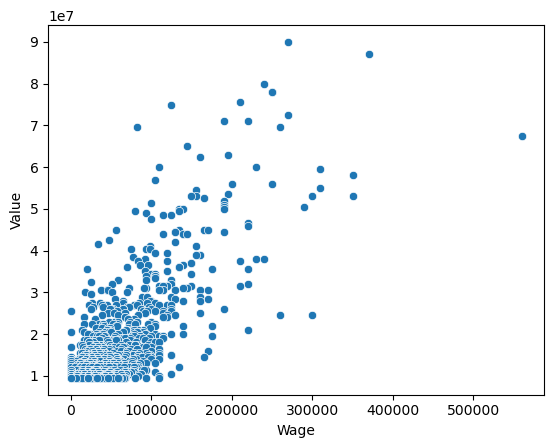

In [169]:
sns.scatterplot(data = df[1:1000], x = "Wage",y = "Value" )

In [172]:
import plotly.express as px

In [182]:
px.scatter(df[1:300],x = "Wage",y = "Value", hover_data = ["Name"])

The code above was to create an interactive scatter plot between player's wages and values.

In [252]:
df.to_csv("Cleaned Dataset.csv")